In [1]:
import numpy as np
import sys
import os
current_notebook_dir = os.getcwd()
# Replace with the path to your IT_PI.py function
project_root_dir = os.path.join(current_notebook_dir, '..', '..')
it_pi_module_dir = project_root_dir
sys.path.append(it_pi_module_dir)
import IT_PI
import matplotlib.pyplot as plt
from numpy.linalg import inv, matrix_rank
from pprint import pprint
import pandas as pd
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True 

In [2]:
df = pd.read_csv("dataset_rb.csv")
data = df.iloc[:, 2:12].to_numpy()

Nu = (data[:, 0] * data[:, 1]) / (data[:, 3] * data[:, 2])  # Nusselt number
Y  = Nu
X  = data[:, [1, 2, 3, 4, 5, 6, 7]] 
Ra = (X[:, 3] * X[:, 4] * X[:, 1] * X[:, 0]**3) / (X[:, 5] * X[:, 6])  # Rayleigh number

variables   = ['h','\\delta_T', '\\lambda','g','\\alpha','\\nu','\\kappa'];                       #Define variable name
D_in             = np.matrix('1 0 1 1 0 2 2;0 0 -3 -2 0 -1 -1; 0 0 1 0 0 0 0; 0 1 -1 0 -1 0 0')                           #Define D_in matrix 
num_input        = 1


In [3]:
print("Rank of D_in:", matrix_rank(D_in))
print("D_in matrix:\n", D_in)
num_rows          = np.shape(D_in)[0]
num_cols          = np.shape(D_in)[1]
# Function to calculate basis matrices

# Generate basis matrices
num_basis        = D_in.shape[1] -matrix_rank(D_in)
basis_matrices   = IT_PI.calc_basis(D_in, num_basis)
basis_matrices   = np.matrix('0 0 0 0 0 1 -1;0 1 0 0 1 0 0;3 0 0 1 0 -2 0')
print("Basis vectors:")
pprint(basis_matrices)

Rank of D_in: 4
D_in matrix:
 [[ 1  0  1  1  0  2  2]
 [ 0  0 -3 -2  0 -1 -1]
 [ 0  0  1  0  0  0  0]
 [ 0  1 -1  0 -1  0  0]]
Basis vectors:
matrix([[ 0,  0,  0,  0,  0,  1, -1],
        [ 0,  1,  0,  0,  1,  0,  0],
        [ 3,  0,  0,  1,  0, -2,  0]])


In [4]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 30},
    seed=42
)


input_PI = results["input_PI"]
epsilon  = results["irreducible_error"]
uq       = results["uncertainty"]

------------------------------------------------------------
num of parameters: 3

Using estimator: 'binning' with hyperparameters: {'num_bins': 30}

(150_w,300)-aCMA-ES (mu_w=78.0,w_1=3%) in dimension 3 (seed=42, Sun Sep  7 10:26:23 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    300 -1.860250115319980e+00 1.0e+00 6.86e-01  5e-01  6e-01 0:00.1
    2    600 -2.087947144504867e+00 2.1e+00 7.32e-01  3e-01  3e-01 0:00.2
    3    900 -2.112812281990455e+00 2.8e+00 7.35e-01  1e-01  2e-01 0:00.3
   40  12000 -2.225425423996337e+00 4.6e+00 3.06e+00  8e-04  2e-03 0:03.3
   49  14700 -2.223603737343460e+00 4.1e+00 5.43e+00  1e-04  3e-04 0:04.1
termination on tolflatfitness=1
final/bestever f-value = -2.223604e+00 -2.225425e+00 after 14700/11913 evaluations
incumbent solution: [0.19265864, 0.19912418, 0.18125247]
std deviation: [0.00013675, 0.00011683, 0.00027325]
Optimized_params: [0.19147416 0.19984324 0.18450925]
Optimized_MI: -2.225425423996337
--------

In [5]:
coef_pi_list     = results["input_coef"]
# for eath coef_pi in coef_pi_list, *3
for coef_pi in coef_pi_list:
    coef_pi *= 3
optimal_pi_lab   = IT_PI.create_labels(np.array(coef_pi_list).reshape(-1, len(variables)), variables)
for j, label in enumerate(optimal_pi_lab):
    print(f'Optimal_pi_lab[{j}] = {label}')
    
input_PI = results["input_PI"]
input_PI = input_PI**3
output_PI = results["output_PI"]

Optimal_pi_lab[0] = $\frac{h^{3.0} \cdot \delta_T^{1.08} \cdot g^{0.99} \cdot \alpha^{1.08}}{\nu^{0.96} \cdot \kappa^{1.05}}$


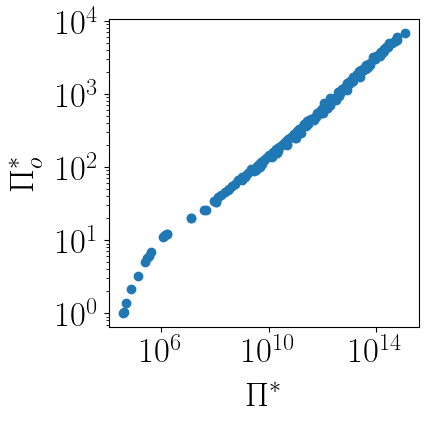

In [6]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(input_PI[:,0],output_PI)
plt.xlabel(r" $\Pi^* $", fontsize=25, labelpad=10)  
plt.ylabel(r" $\Pi_o^*$", fontsize=25, labelpad=10)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks([1e6, 1e10, 1e14])
plt.savefig("Benard.eps", format="eps", bbox_inches="tight",transparent = "True")


In [7]:
import pickle

workspace = {}
globals_copy = dict(globals())

for key, value in globals_copy.items():
    if not key.startswith('_') and not callable(value) and not hasattr(value, '__module__'):
        try:
            pickle.dumps(value)  # Test if it can be pickled
            workspace[key] = value
        except (TypeError, AttributeError):
            print(f"Skipping {key} - cannot pickle")

with open('output.pkl', 'wb') as f:
    pickle.dump(workspace, f)

Skipping np - cannot pickle
Skipping sys - cannot pickle
Skipping os - cannot pickle
Skipping IT_PI - cannot pickle
Skipping plt - cannot pickle
Skipping pd - cannot pickle
Skipping pickle - cannot pickle
